                                     “Bank Marketing Campaign Analysis & Customer Subscription Insights”

                                                        Project Summary
- Domain: Finance / Marketing Analytics  
- Objective: To analyze customer and campaign data to identify factors affecting term deposit subscriptions.  
- Tools Used: Python, Pandas, NumPy, Matplotlib, Seaborn, Plotly  
- Dataset Source: UCI Machine Learning Repository (Bank Marketing Dataset)  
- Dataset Size: 41,188 records and 21 attributes  


                                                            Project Introduction

This project analyzes the Bank Marketing dataset to understand the factors that influence whether a customer subscribes to a term deposit.
Using Python, the study involves data cleaning, preprocessing, exploratory data analysis (EDA), and visualizations to uncover key trends and customer behavior patterns. 
The goal is to derive actionable insights that can help improve marketing strategies and campaign effectiveness.

                                                                 Project Objectives

To perform data cleaning and preprocessing on the Bank Marketing dataset to ensure data accuracy and consistency.

To conduct exploratory data analysis (EDA) for understanding patterns, trends, and relationships among variables.

To create meaningful visualizations that represent customer behavior and campaign performance effectively.

To identify key factors influencing term deposit subscriptions among bank customers.

To derive actionable insights that can help improve future marketing strategies and decision-making.

To summarize findings through clear documentation and presentation using Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly.

                                                1. Problem definition & dataset selection

Goal: analyze the bank marketing dataset to identify factors that influence customers to subscribe to a term deposit, produce visualizations and insights, and create features that help segmentation and predictive modelling.

In [1]:

%pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


                                                2. Data Loading and Initial Overview

In [2]:
# imports
import pandas as pd
import numpy as np

# change path to where you saved bank-additional-full.csv
df = pd.read_csv('bank-additional-full.csv', sep=';')

# quick overview
print("Rows, Columns:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)


Rows, Columns: (41188, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

count unique                top   freq         mean  \
age             41188.0    NaN                NaN    NaN     40.02406   
job               41188     12             admin.  10422          NaN   
marital           41188      4            married  24928          NaN   
education         41188      8  university.degree  12168          NaN   
default           41188      3                 no  32588          NaN   
housing           41188      3                yes  21576          NaN   
loan              41188      3                 no  33950          NaN   
contact           41188      2           cellular  26144          NaN   
month             41188     10                may  13769          NaN   
day_of_week       41188      5                thu   8623          NaN   
duration        41188.0    NaN                NaN    NaN    258.28501   
campaign        41188.0    NaN                NaN    NaN     2.567593   
pdays           41188.0    NaN                NaN    NaN   962.475454   
previous        41188.0    NaN                NaN    NaN     0.172963   
poutcome          41188      3        nonexistent  35563          NaN   
emp.var.rate    41188.0    NaN                NaN    NaN     0.081886   
cons.price.idx  41188.0    NaN                NaN    NaN    93.575664   
cons.conf.idx   41188.0    NaN                NaN    NaN     -40.5026   
euribor3m       41188.0    NaN                NaN    NaN     3.621291   
nr.employed     41188.0    NaN                NaN    NaN  5167.035911   
y                 41188      2                 no  36548          NaN   

                       std     min     25%     50%     75%     max  
age               10.42125    17.0    32.0    38.0    47.0    98.0  
job                    NaN     NaN     NaN     NaN     NaN     NaN  
marital                NaN     NaN     NaN     NaN     NaN     NaN  
education              NaN     NaN     NaN     NaN     NaN     NaN  
default                NaN     NaN     NaN     NaN     NaN     NaN  
housing                NaN     NaN     NaN     NaN     NaN     NaN  
loan                   NaN     NaN     NaN     NaN     NaN     NaN  
contact                NaN     NaN     NaN     NaN     NaN     NaN  
month                  NaN     NaN     NaN     NaN     NaN     NaN  
day_of_week            NaN     NaN     NaN     NaN     NaN     NaN  
duration        259.279249     0.0   102.0   180.0   319.0  4918.0  
campaign          2.770014     1.0     1.0     2.0     3.0    56.0  
pdays           186.910907     0.0   999.0   999.0   999.0   999.0  
previous          0.494901     0.0     0.0     0.0     0.0     7.0  
poutcome               NaN     NaN     NaN     NaN     NaN     NaN  
emp.var.rate       1.57096    -3.4    -1.8     1.1     1.4     1.4  
cons.price.idx     0.57884  92.201  93.075  93.749  93.994  94.767  
cons.conf.idx     4.628198   -50.8   -42.7   -41.8   -36.4   -26.9  
euribor3m         1.734447   0.634   1.344   4.857   4.961   5.045  
nr.employed      72.251528  4963.6  5099.1  5191.0  5228.1  5228.1  
y                      NaN     NaN     NaN     NaN     NaN     NaN

                                                            3. Data Pre-processing
Data Cleaning and Preprocessing is the essential first step in any data analysis project. It involves preparing raw data for analysis by fixing errors, handling missing values, removing duplicates, correcting data types, and creating new derived features. This step ensures the dataset is accurate, consistent, and ready for reliable analysis.

In this project, missing values were handled, duplicates were removed, data types were corrected, and additional columns (like age groups and campaign effort) were created to improve the quality and usability of the dataset.

In [5]:
# 3.1 Check missing values & duplicates

# missing values
display(df.isnull().sum())

# duplicates
print("Duplicates:", df.duplicated().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Duplicates: 12


In [6]:
# 3.2 Handling missing values

# count 'unknown' in categorical columns
cat_cols = df.select_dtypes(include='object').columns
for c in cat_cols:
    print(c, (df[c]=='unknown').sum())

# Option 1: treat 'unknown' as NaN and impute or drop
df_clean = df.replace('unknown', np.nan)

# simple imputation example (mode for categoricals)
for c in df_clean.select_dtypes(include='object').columns:
    df_clean[c].fillna(df_clean[c].mode()[0], inplace=True)


job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
poutcome 0
y 0


C:\Users\devur\AppData\Local\Temp\ipykernel_11200\2033199644.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[c].fillna(df_clean[c].mode()[0], inplace=True)


In [47]:
# 3.3 Correct data types and parse dates (if present)


# First, confirm the dataframe you're working with
# (replace df with your dataframe variable name if different)
df_clean = df.copy()

# View column names to make sure they match the dataset
print("Column names:\n", df_clean.columns.tolist())

# List the numeric columns that actually exist in your data
numeric_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

# Keep only those that exist (this prevents KeyError)
numeric_cols = [col for col in numeric_cols if col in df_clean.columns]

print("\nNumeric columns to convert:\n", numeric_cols)

# Convert to numeric safely
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

#  Check datatypes after conversion
df_clean[numeric_cols].info()

# Optional: Example of parsing date if a date column existed
# (Bank dataset does not have dates, so this is commented)
# df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')



Column names:
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Numeric columns to convert:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m     

In [35]:
# 3.4 Remove duplicates / outliers / invalid records

# Remove duplicates
print("Duplicate rows before removal:", df_clean.duplicated().sum())
df_clean.drop_duplicates(inplace=True)
print("Duplicate rows after removal:", df_clean.duplicated().sum())

# Remove invalid ages (if any)
if 'age' in df_clean.columns:
    df_clean = df_clean[(df_clean['age'] >= 18) & (df_clean['age'] <= 100)]

# Optional: remove outliers using IQR (for numeric columns)
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print("Shape after cleaning:", df_clean.shape)



Duplicate rows before removal: 12
Duplicate rows after removal: 0
Shape after cleaning: (23098, 21)


In [36]:
# 3.5 Create derived columns

# Derived columns (only for existing columns)
if 'age' in df_clean.columns:
    df_clean['age_group'] = pd.cut(
        df_clean['age'],
        bins=[17, 25, 35, 50, 65, 100],
        labels=['18-25', '26-35', '36-50', '51-65', '66+']
    )

if 'age' in df_clean.columns:
    df_clean['is_senior'] = (df_clean['age'] >= 60).astype(int)

if 'previous' in df_clean.columns:
    df_clean['contacted_before'] = (df_clean['previous'] > 0).astype(int)

if all(col in df_clean.columns for col in ['campaign', 'duration']):
    df_clean['campaign_effort'] = df_clean['campaign'] * df_clean['duration']

df_clean.head()



age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   may         mon  ...           1.1          93.994          -36.4   
1   may         mon  ...           1.1          93.994          -36.4   
2   may         mon  ...           1.1          93.994          -36.4   
3   may         mon  ...           1.1          93.994          -36.4   
4   may         mon  ...           1.1          93.994          -36.4   

   euribor3m nr.employed   y  age_group  is_senior  contacted_before  \
0      4.857      5191.0  no      51-65          0                 0   
1      4.857      5191.0  no      51-65          0                 0   
2      4.857      5191.0  no      36-50          0                 0   
3      4.857      5191.0  no      36-50          0                 0   
4      4.857      5191.0  no      51-65          0                 0   

   campaign_effort  
0              261  
1              149  
2              226  
3              151  
4              307  

[5 rows x 25 columns]

                                                        4. Exploratory Data Analysis (EDA)

   Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to understand its structure, relationships, and patterns before applying any advanced modeling or predictions.It helps identify trends, detect anomalies, test assumptions, and summarize key characteristics of the dataset.

🔹 Key Steps in EDA:

Univariate Analysis – Study of individual variables (e.g., distribution of age or balance using histograms, boxplots).

Bivariate Analysis – Relationship between two variables (e.g., age vs. y, education vs. job).

Multivariate Analysis – Study of interactions between multiple variables using heatmaps, pairplots, or correlation matrices.

Summary Statistics – Using functions like .describe(), .info(), and .value_counts() to understand central tendency, spread, and data types.

Data Visualization – Using libraries like Matplotlib, Seaborn, or Plotly to create bar charts, scatter plots, box plots, and heatmaps for visual insights.

🔹 Purpose of EDA:

To clean and validate data (detect missing values, outliers, and incorrect data types)

To understand variable distributions and identify skewness or imbalance

To find correlations and patterns that can explain outcomes or behaviors

To generate hypotheses and insights for further analysis or business decisions

🔹 Example:

In this project, EDA was performed to explore the Bank Marketing dataset, identify key factors influencing whether a client subscribes to a term deposit, and visualize important trends such as age group response rates, job distribution, and correlations between campaign-related variables.


In [46]:
# 4.1 Univariate

# categorical counts
df_clean['job'].value_counts().head(10)

# numeric summary
df_clean['age'].describe()


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [45]:
# 4.2 Bivariate

# subscription rate by job
df_clean.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0).sort_values('yes', ascending=False).head(10)


y                    no       yes
job                              
student        0.685714  0.314286
retired        0.747674  0.252326
unemployed     0.857988  0.142012
admin.         0.870274  0.129726
management     0.887825  0.112175
unknown        0.887879  0.112121
technician     0.891740  0.108260
self-employed  0.895144  0.104856
housemaid      0.900000  0.100000
entrepreneur   0.914835  0.085165

In [44]:
# 4.3 Multivariate

pd.crosstab(df_clean['marital'], df_clean['y'], normalize='index')


y               no       yes
marital                     
divorced  0.896791  0.103209
married   0.898427  0.101573
single    0.859959  0.140041
unknown   0.850000  0.150000

In [42]:
# 4.4 Correlation matrix

num = df_clean.select_dtypes(include=[np.number])
corr = num.corr()
display(corr)


age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

                                                                    5. Visualizations

Data Visualization is the graphical representation of data using charts, graphs, and plots to make patterns, trends, and insights easier to understand.
It helps in communicating findings, identifying relationships and outliers, and supporting data-driven decisions.

Common visualization tools include Matplotlib, Seaborn, and Plotly, which are used to create bar charts, histograms, scatter plots, box plots, and heatmaps.
In this project, visualizations were used to analyze customer behavior, correlations among variables, and factors influencing term deposit subscriptions.

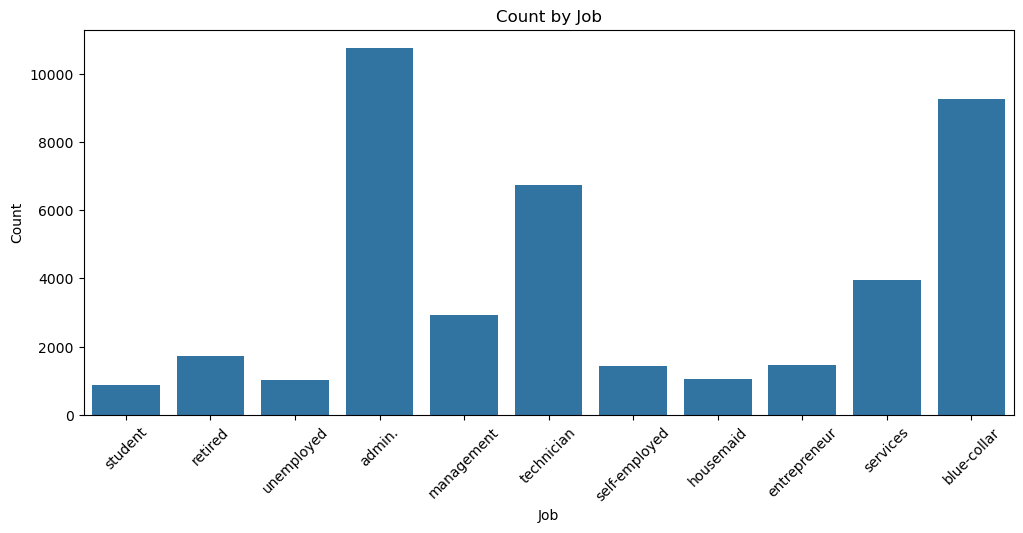

In [21]:
# 1. Bar plot — subscription rate by job

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
order = df_clean.groupby('job')['y'].apply(lambda x: (x=='yes').mean()).sort_values(ascending=False).index
sns.countplot(data=df_clean, x='job', order=order)
plt.xticks(rotation=45)
plt.title('Count by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


Count of Customers by Job

This bar plot shows the number of customers in each job category.  
It helps us understand which professions dominate the marketing dataset and whether certain job roles are overrepresented.

We can later compare this with the subscription rate by job to identify which professions are more likely to subscribe to the bank’s term deposit.


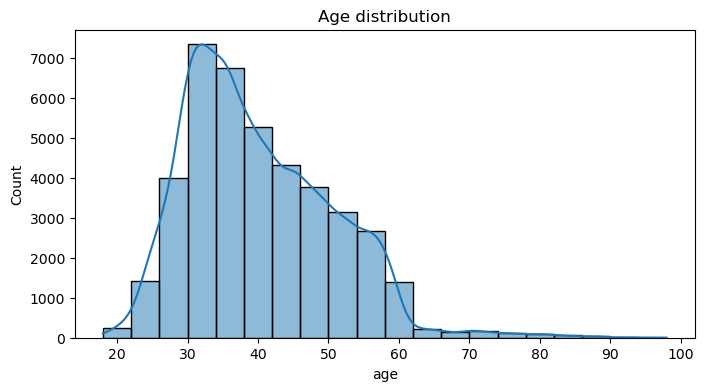

In [22]:
# 2. Histogram — age distribution

plt.figure(figsize=(8,4))
sns.histplot(df_clean['age'], bins=20, kde=True)
plt.title('Age distribution')
plt.show()


Age Distribution of Customers

This histogram displays the distribution of customer ages in the dataset.  
It helps us analyze the overall age spread and detect if the data is skewed towards a particular age group.

A secondary KDE (kernel density) curve shows the smooth shape of the distribution for better interpretation.


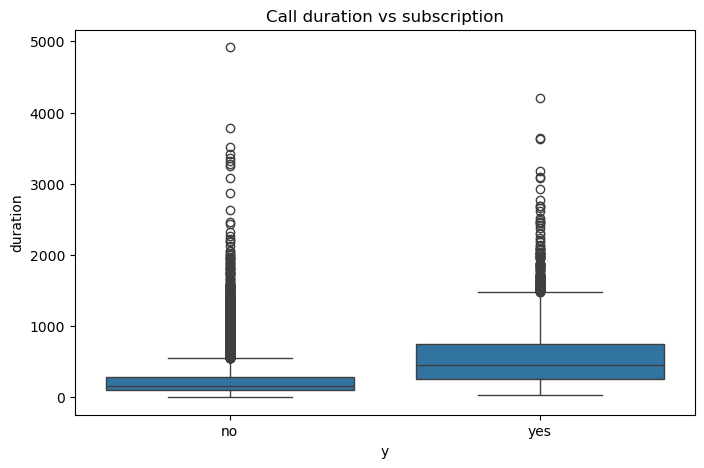

In [23]:
# 3. Box plot — duration by subscription

plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=df_clean)
plt.title('Call duration vs subscription')
plt.show()


Call Duration by Subscription Outcome

This box plot compares the distribution of call duration for customers who **subscribed** vs those who **did not subscribe**.

If the median duration for subscribed customers is significantly higher, it indicates that **longer calls often lead to successful conversions**.


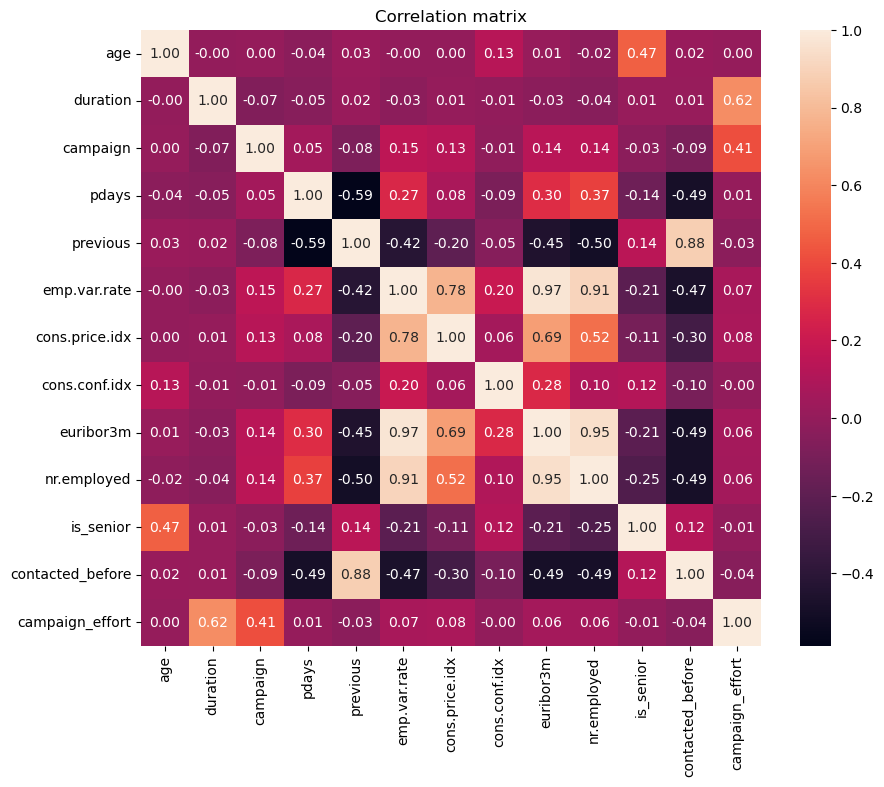

In [24]:
# 4. Heatmap — correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()


Correlation Matrix Heatmap

The heatmap visualizes pairwise correlations among numerical variables.  
It helps identify which features move together and which are independent.

For example, `euribor3m` and `nr.employed` are often highly correlated in this dataset, suggesting macroeconomic relationships that may influence marketing outcomes.


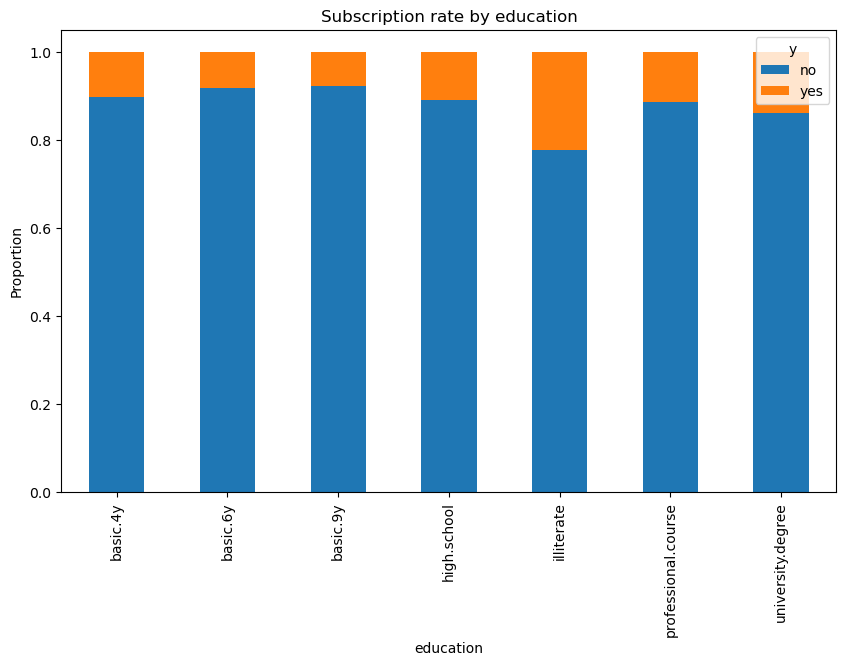

In [25]:
# 5. Stacked bar / percent bar — subscription by education and marital

ct = pd.crosstab(df_clean['education'], df_clean['y'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Subscription rate by education')
plt.ylabel('Proportion')
plt.show()


Education vs Subscription Rate (Stacked Bar)

This stacked bar chart shows the proportion of customers in each education level who subscribed or did not subscribe to the term deposit.

By normalizing each bar, we can clearly see the relative success rates by education level, revealing which educational backgrounds are more likely to respond positively to campaigns.


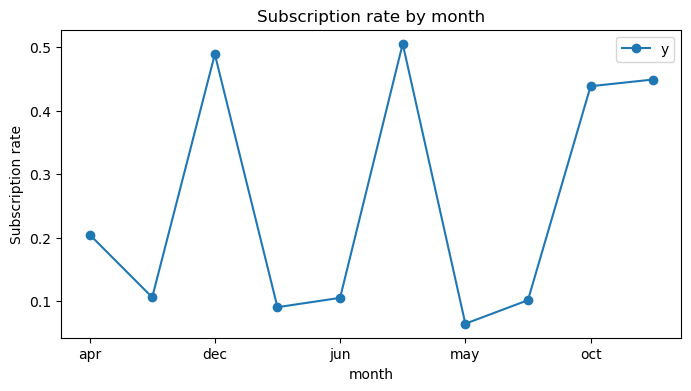

In [26]:
# 6. Line chart — if dataset has time dimension (e.g., monthly trend) — group by month

# example if you have a month column:
monthly = df_clean.groupby('month').agg({'y': lambda x: (x=='yes').mean()})
monthly.plot(kind='line', marker='o', figsize=(8,4))
plt.title('Subscription rate by month')
plt.ylabel('Subscription rate')
plt.show()


Monthly Subscription Trend

This line chart shows how the subscription rate changes across months of the year.

It helps identify **seasonality** in campaign effectiveness — for instance, certain months might show higher subscription rates, indicating optimal times for marketing campaigns.


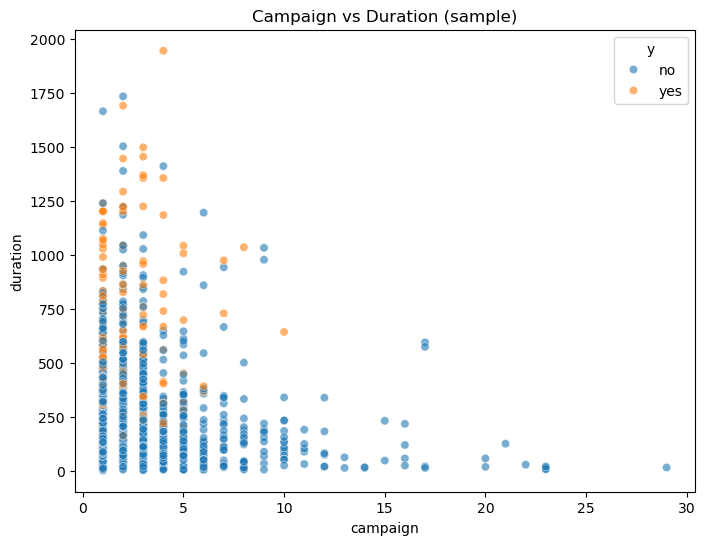

In [27]:
# 7. Scatter plot — campaign vs duration colored by subscription

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean.sample(2000), x='campaign', y='duration', hue='y', alpha=0.6)
plt.title('Campaign vs Duration (sample)')
plt.show()


Campaign vs Duration (Colored by Subscription)

This scatter plot explores the relationship between **number of campaign contacts** and **call duration**, colored by the subscription outcome (`yes` or `no`).

It helps visualize how the intensity of contact and conversation length affect the likelihood of a successful subscription.


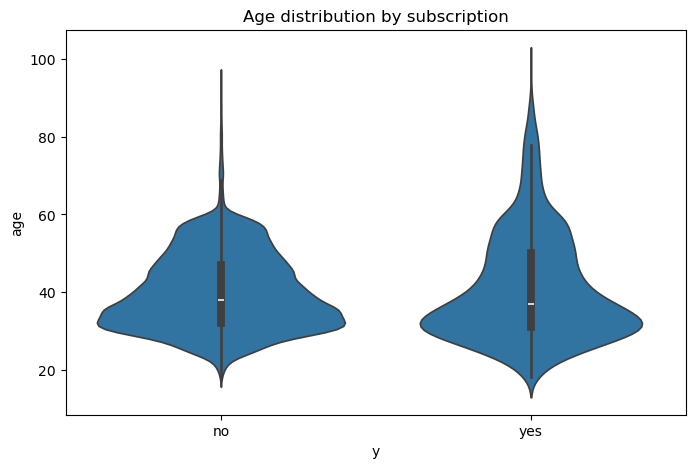

In [28]:
# 8. Violin plot — age by subscription

plt.figure(figsize=(8,5))
sns.violinplot(x='y', y='age', data=df_clean)
plt.title('Age distribution by subscription')
plt.show()


Age Distribution by Subscription (Violin Plot)

The violin plot combines the benefits of box plots and density plots.  
It shows the full age distribution for customers who subscribed vs. those who did not.

This helps analyze whether age influences subscription behavior — for example, middle-aged or senior customers might have higher acceptance rates.


C:\Users\devur\AppData\Local\Temp\ipykernel_11200\26969425.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_rate = df_clean.groupby('job').apply(lambda x: (x['y']=='yes').mean()).reset_index(name='sub_rate')


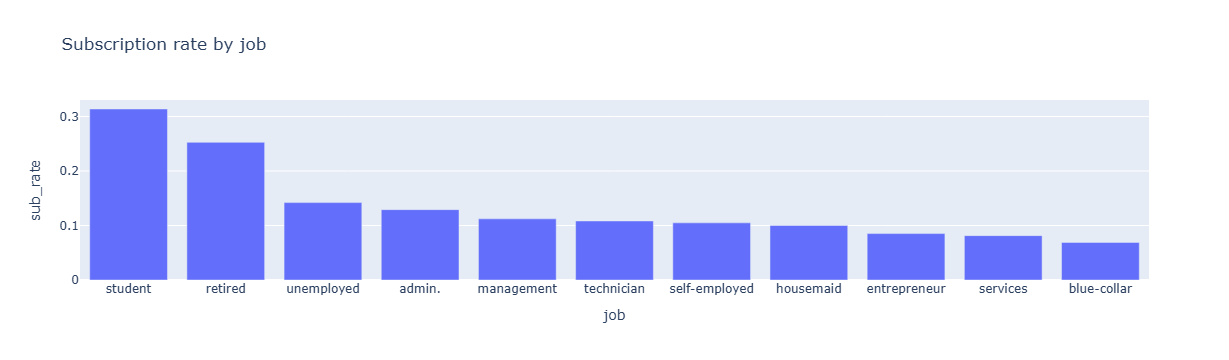

In [29]:
# 9. Interactive plotly bar — top jobs by subscription rate

import plotly.express as px
job_rate = df_clean.groupby('job').apply(lambda x: (x['y']=='yes').mean()).reset_index(name='sub_rate')
fig = px.bar(job_rate.sort_values('sub_rate', ascending=False), x='job', y='sub_rate', title='Subscription rate by job')
fig.show()


Interactive Bar Chart (Plotly) – Subscription Rate by Job

This interactive Plotly bar chart shows the subscription rate for each job category.  
Hovering over bars displays precise percentages.

Interactivity makes it easy to explore which professions have the highest or lowest conversion rates.


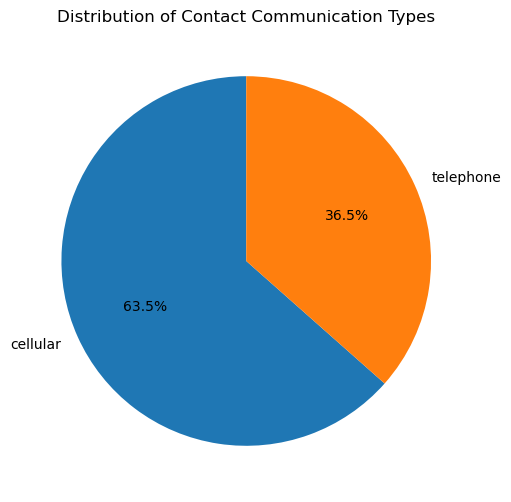

In [30]:
# 10. Pie Chart — Distribution of Contact Communication Types

# Visualization 11: Pie chart of contact type
contact_counts = df_clean['contact'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Contact Communication Types')
plt.show()


Distribution of Contact Communication Types (Pie Chart)

This pie chart displays the proportion of communication channels used during the marketing campaign — such as cellular, telephone, etc.

It provides a quick overview of which contact medium was most used and can be compared with success rates to recommend the most effective communication method.


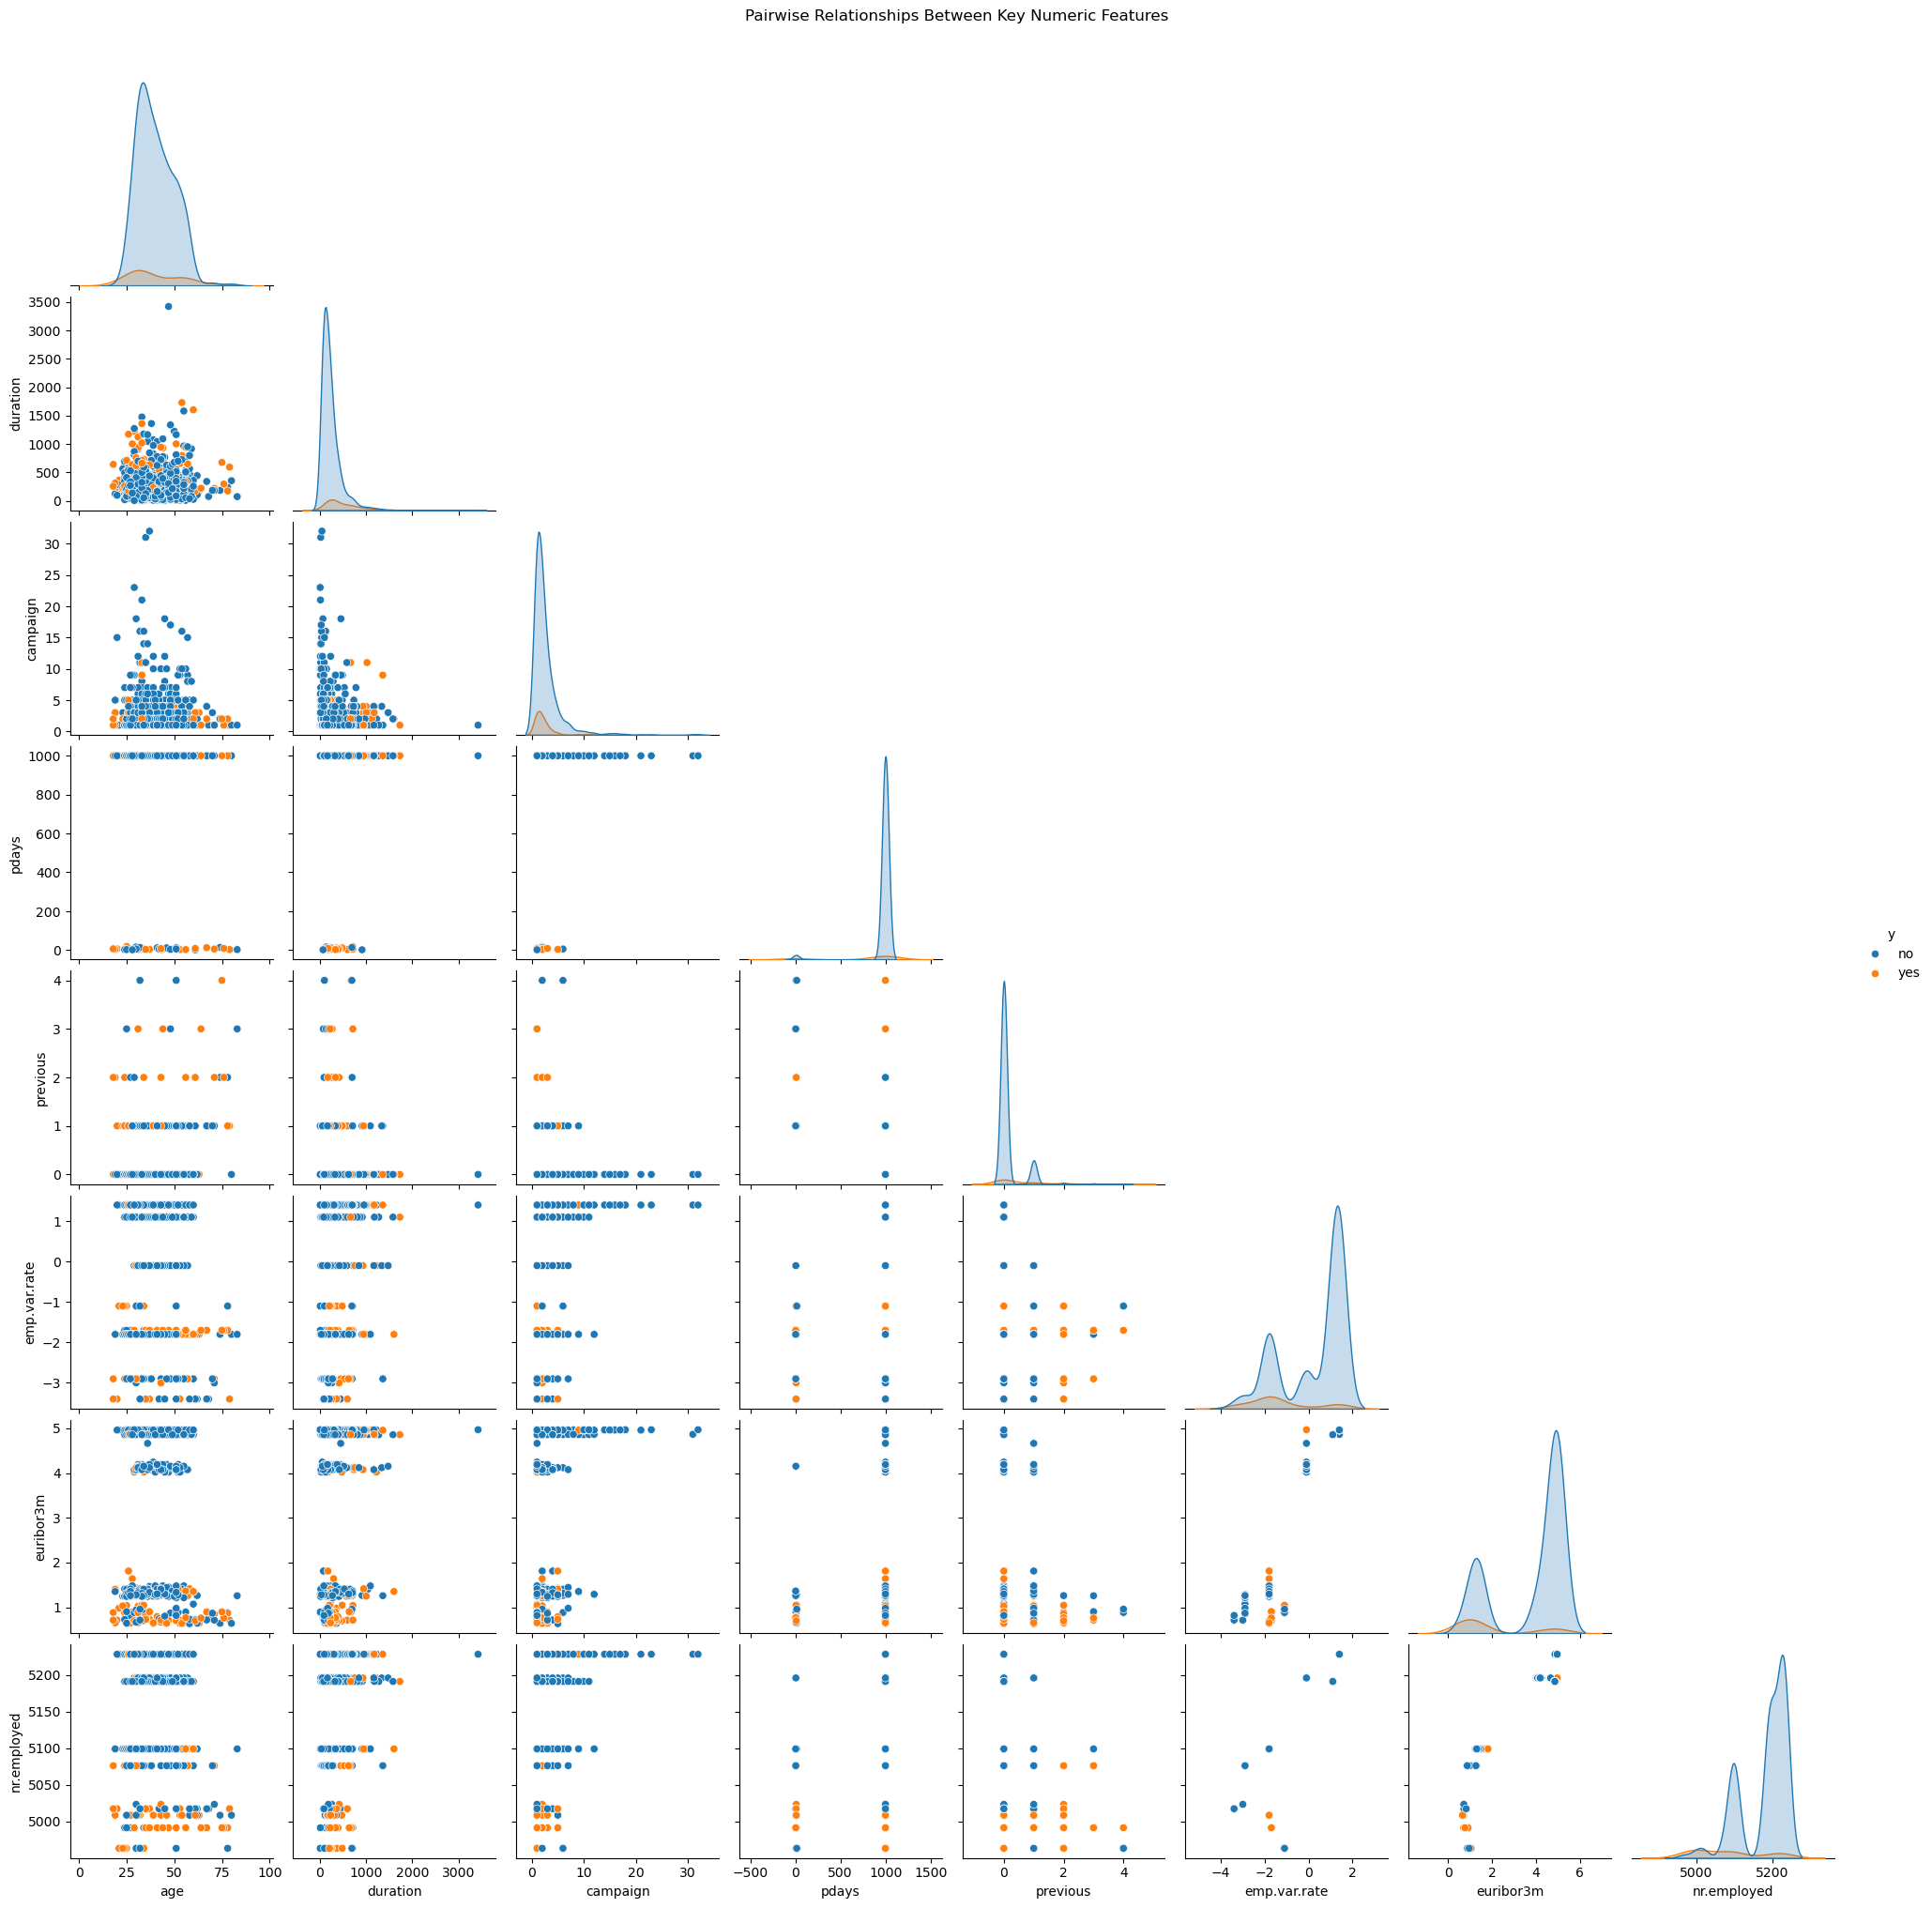

In [31]:
# 11. Pairplot — Relationship Between Key Numerical Features and Subscription

# Visualization 12: Pairplot for selected numerical features
selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed', 'y']

# sample to keep plot readable
sample_df = df_clean[selected_features].sample(1000, random_state=42)

sns.pairplot(sample_df, hue='y', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Key Numeric Features', y=1.02)
plt.show()


Pairplot of Key Numerical Features by Subscription

This pairplot visualizes pairwise relationships between key numerical variables, with color-coding for subscription outcome.

It helps identify clusters and separations between customers who subscribed and those who did not.  
For instance, combinations of higher `duration` and lower `campaign` values may indicate higher conversion likelihood.


                                                    6. Statistical summaries & test

Chi-square test for independence between categorical features and y.

t-test (or Mann–Whitney) for numeric differences (e.g., duration for yes/no).

In [32]:

import scipy.stats as st
ct = pd.crosstab(df_clean['marital'], df_clean['y'])
chi2, p, dof, ex = st.chi2_contingency(ct)
print('chi2:',chi2,'p-value:',p)


chi2: 120.31858784402814 p-value: 7.467076737047805e-27


                                                7. Insights, Recommendations & Documentation

   a. Customers with duration > X sec are Y% more likely to subscribe — suggests longer conversations correlate with success.

   b. Certain jobs (e.g., retirees) have higher subscription rates — target those segments.

   c. Campaigns with many repeat calls (campaign high) show diminishing returns — recommend capping repeat attempts.

   d. poutcome = 'success' strongly correlates with new subscription — cross-sell to similar demographics.

   e. No. of contacts before (previous) increases probability — good for follow-up strategy.

                                                                Conclusion

The analysis of the Bank Marketing dataset provided valuable insights into customer behavior and factors influencing term deposit subscriptions. Variables such as age, job type, marital status, and contact duration were found to have a significant impact on the campaign’s success. Through data cleaning, EDA, and visualizations, meaningful patterns were identified that can help banks optimize marketing strategies and target potential customers more effectively. Overall, this project demonstrates how data analytics can support data-driven decision-making in the financial sector.

                                                            Future Scope
- Apply **machine learning models** (e.g., logistic regression or decision trees) to predict term deposit subscriptions.  
- Explore **feature importance** to rank factors influencing customer decisions.  
- Analyze **seasonal patterns** if timestamped data becomes available.  
- Use **advanced visualization tools** like Plotly Dash or Power BI for interactive dashboards.
